In [1]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [2]:
import time

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import warnings
# Settings the warnings to be ignored
warnings.filterwarnings('ignore')
#G=nx.Graph()

In [4]:
%%time
# Mean Degree c generation between (0,4)
c = int(input("Enter number of Mean Degree:"))
import random as rnd
mean_degree = []
for i in range(c):
    mean_degree.append(rnd.uniform(0,4))
    mean_degree.sort()
#print(mean_degree)
print("The number of seclected mean degree between 0 and 4:",len(mean_degree))

Enter number of Mean Degree:50
The number of seclected mean degree between 0 and 4: 50
CPU times: user 21.2 ms, sys: 11.6 ms, total: 32.9 ms
Wall time: 5.16 s


In [5]:
# This is another way to select mean degree for small collection
# The mean degree c of the network varies from 0 to 4.
# mean_degree = []
# for i in range(0,32,1):
#     mean_degree.append(i/8)
    
# mean_degree

In [6]:
%%time
# Random poission Graph generation and obtain the size of the giant components
n = int(input("Enter number of nodes:"))
ite = int(input("Number of iteration for each mean degree :"))
tem_lis =[]
avg_size_gc =[]
for c in mean_degree:
    p = c/(n-1)
    for i in range(ite):
        H = nx.gnp_random_graph(n,p)
        giant_cc = max(nx.connected_components(H),key = len)
#        print(giant_cc)
        tem_lis.append(len(giant_cc))
#    print(f"size of giant component for {ite} iterations",tem_lis)
    arr = np.array(tem_lis)
#    print("array",arr)
    avg_size_gc.append(arr.mean())
#    print(f"list of average size of the Giant component for {c}:",avg_size_gc)
    tem_lis =[]
#    print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
        

Enter number of nodes:14346
Number of iteration for each mean degree :10
CPU times: user 1h 37min 47s, sys: 503 ms, total: 1h 37min 47s
Wall time: 1h 38min 6s


In [7]:
#avg_size_gc

In [8]:

# converting to array to do simple math operations
avg_size_gc = np.array(avg_size_gc)
#avg_size_gc

In [9]:
frac_avg_size_gc = avg_size_gc/n 
#frac_avg_size_gc

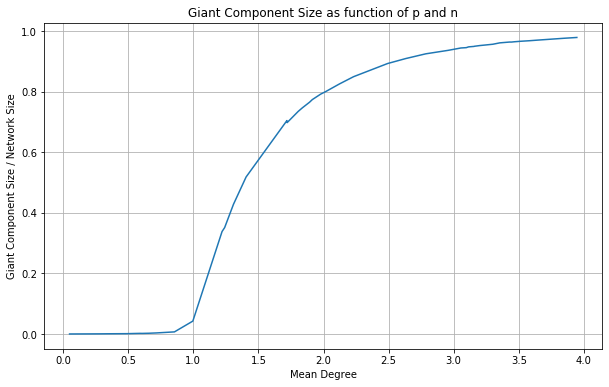

In [10]:
# The below plot for computational experiment result
plt.figure(figsize=(10,6))
plt.plot(mean_degree,frac_avg_size_gc)
plt.title("Giant Component Size as function of p and n")
plt.xlabel("Mean Degree")
plt.ylabel('Giant Component Size / Network Size')
plt.grid(True)
plt.show()

# Now the time to compare the experimental result with the theoretical result.

In [11]:
%%time
# we solve the equation S = 1 - e^(cS) by newton Rapshon Method
import math

def f(x, c):
    return x - (1 - math.exp(-c*x))

def f_prime(x, c):
    return 1 + c*math.exp(-c*x)

def newton_raphson(x0, c, tolerance=1e-6, max_iterations=10000):
    x = x0
    for i in range(max_iterations):
        f_value = f(x, c)
        f_prime_value = f_prime(x, c)
        x_new = x - f_value / f_prime_value
        if abs(x_new - x) < tolerance:
            return x_new
        x = x_new
    return None

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 13.8 µs


In [12]:
%%time
xaxis= mean_degree
yaxis=[]
x0=0.5 # initial assumption
# for i in range(200000):
#     c = random.uniform(0,4)
#     xaxis.append(c)
# xaxis.sort()
for i in xaxis:
    x = newton_raphson(x0, i)
    if x is not None:
        #print("The solution is:", x)
        yaxis.append(x)
    else:
        print("No solution found within the maximum number of iterations.")

CPU times: user 2.18 ms, sys: 0 ns, total: 2.18 ms
Wall time: 2.18 ms


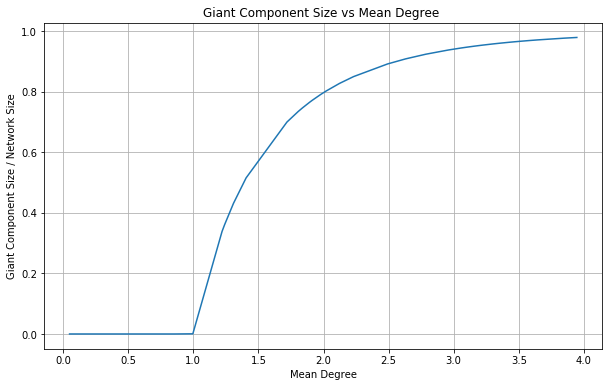

In [13]:
# Theoritical result plot
plt.figure(figsize=(10,6))
plt.plot(xaxis,yaxis)
plt.title("Giant Component Size vs Mean Degree ")
plt.xlabel("Mean Degree")
plt.ylabel('Giant Component Size / Network Size')
plt.grid(True)
plt.show()

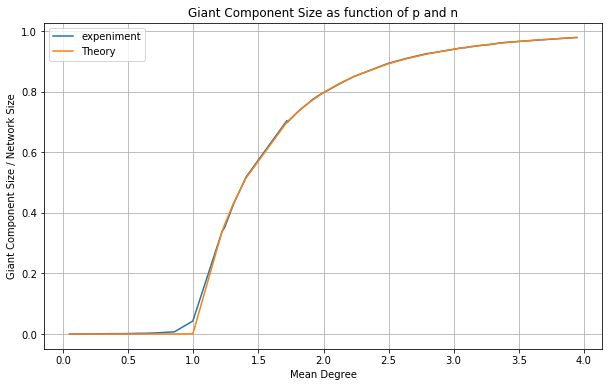

In [14]:
# comparison between theoritical result and experimental result
plt.figure(figsize=(10,6))
plt.plot(mean_degree,frac_avg_size_gc)
plt.plot(xaxis,yaxis)
plt.title("Giant Component Size as function of p and n")
plt.xlabel("Mean Degree")
plt.ylabel('Giant Component Size / Network Size')
plt.grid(True)
plt.legend(["expeniment","Theory"])
plt.show()

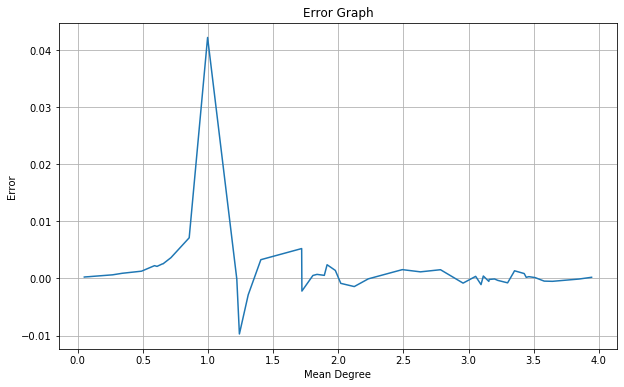

In [16]:
error=[]
for i in range(len(frac_avg_size_gc)):
    error.append(frac_avg_size_gc[i]-yaxis[i])
plt.figure(figsize=(10,6))
#plt.plot(mean_degree,frac_avg_size_gc)
plt.plot(xaxis,error)
plt.title("Error Graph")
plt.xlabel("Mean Degree")
plt.ylabel('Error')
plt.grid(True)
plt.show()

# <==========================THE END========================>